### Import libraries 

In [1]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white')

## Load data from final csv

In [2]:
train = pd.read_csv("final_loan_train.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
LoanAmountTerm            614 non-null float64
CreditHistory             614 non-null float64
LoanStatus                614 non-null int64
LoanAmountLog             614 non-null float64
IncomeLog                 614 non-null float64
Gender_Female             614 non-null int64
Gender_Male               614 non-null int64
Married_No                614 non-null int64
Married_Yes               614 non-null int64
Dependents_0              614 non-null int64
Dependents_1              614 non-null int64
Dependents_2              614 non-null int64
Dependents_3              614 non-null int64
Education_Graduate        614 non-null int64
Education_Not Graduate    614 non-null int64
SelfEmployed_No           614 non-null int64
SelfEmployed_Yes          614 non-null int64
PropertyArea_Rural        614 non-null int64
PropertyArea_Semiurban    614 non-null int64
PropertyArea_Urban        614 no

In [4]:
train.columns

Index(['LoanAmountTerm', 'CreditHistory', 'LoanStatus', 'LoanAmountLog',
       'IncomeLog', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3', 'Education_Graduate', 'Education_Not Graduate',
       'SelfEmployed_No', 'SelfEmployed_Yes', 'PropertyArea_Rural',
       'PropertyArea_Semiurban', 'PropertyArea_Urban'],
      dtype='object')

In [8]:
y = train.LoanStatus
X = train.drop('LoanStatus',axis=1)

In [6]:
y.shape, X.shape

((614,), (614, 19))

## Build Model using Logistic Regression

In [6]:
# Importing packages logistic regression and evaluation 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

### Split data into train and test data 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [9]:
# logistic regression   
model = LogisticRegression()
model.fit(X_train,y_train)

d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# Check model's performance with train data 
model.score(X_train,y_train)

0.8044806517311609

In [11]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy_score :',score)   

Accuracy_score : 0.8292682926829268


In [12]:
model.intercept_, model.coef_

(array([-0.04593518]),
 array([[-1.33610905e-03,  3.26312876e+00, -3.67397792e-01,
          3.56821059e-02, -6.57005969e-04, -4.52781755e-02,
         -2.10908409e-01,  1.64973227e-01, -8.93252731e-02,
         -2.95437733e-01,  1.28944933e-01,  2.09882891e-01,
          1.85495510e-01, -2.31430691e-01, -7.36218842e-02,
          2.76867027e-02, -3.41241402e-01,  3.95609845e-01,
         -1.00303625e-01]]))

In [28]:
y_pred_prob = model.predict_proba(X_test)

### Display confusion matrix

In [14]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[14, 19],
       [ 2, 88]], dtype=int64)

(0, 2)

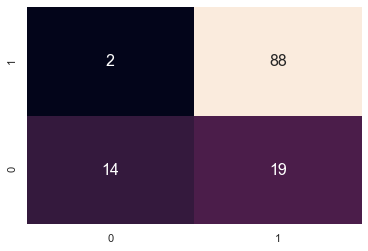

In [15]:
ax  = sns.heatmap(cm, annot=True, annot_kws={'size':16},cbar= False)
ax.set_ylim((0,2))

In [16]:
print('Accuracy :', (14 + 88) / (14 + 88 + 2 + 19))

Accuracy : 0.8292682926829268


In [17]:
print('Sensitivity', 88 / (88 + 2))

Sensitivity 0.9777777777777777


In [18]:
print("Positive Precision :", 88 / (88 + 19))

Positive Precision : 0.822429906542056


In [19]:
print('Specificity', 14 / (14 + 19))

Specificity 0.42424242424242425


In [20]:
print("Negative Precision :", 14 / (14 + 2))

Negative Precision : 0.875


### Display classification report

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [24]:
model.score(X_train,y_train)

1.0

In [25]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.7560975609756098


In [26]:
confusion_matrix(y_test, y_pred)

array([[24,  9],
       [21, 69]], dtype=int64)

In [30]:
precision_score(y_test,y_pred)

0.8846153846153846

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.73      0.62        33
           1       0.88      0.77      0.82        90

    accuracy                           0.76       123
   macro avg       0.71      0.75      0.72       123
weighted avg       0.79      0.76      0.77       123



In [32]:
model.feature_importances_

array([0.0448911 , 0.2945244 , 0.15048077, 0.33244153, 0.00883629,
       0.00561744, 0.01324336, 0.00759611, 0.01971502, 0.        ,
       0.01364199, 0.01450828, 0.00930136, 0.01846984, 0.00269605,
       0.00851191, 0.01588982, 0.02413248, 0.01550226])

### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

d:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
model.score(X_train,y_train)

0.9877800407331976

In [36]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.7398373983739838


## KNN 

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [49]:
model.score(X_train,y_train)

0.7922606924643585

In [50]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)  

accuracy_score 0.7398373983739838


## Naive Bayes 

In [3]:
from sklearn.naive_bayes import GaussianNB

In [10]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
model.score(X_train,y_train)

0.8065173116089613

In [12]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.8292682926829268


## Support Vector Machines

In [51]:
from sklearn.svm import SVC

In [52]:
model = SVC()
model.fit(X_train,y_train)

d:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [53]:
model.score(X_train,y_train)

0.7983706720977597

In [54]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.8130081300813008


## Check cross validation scores with different algorithms 

In [13]:
from sklearn.model_selection import cross_val_score
all_scores = {}

In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1)
scores = cross_val_score(clf,X, y,cv=5)
print(scores)
print('The accuracy of LogisticRegression is %.2f%%' % (scores.mean()*100))
all_scores['LogisticRegression'] = ( scores.mean() * 100)

[0.81451613 0.76612903 0.78688525 0.86065574 0.81967213]
The accuracy of LogisticRegression is 80.96%


d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
scores = cross_val_score(clf,X, y,cv=5)
print(scores)
print('The accuration of GaussianNB is %.2f%%' % (scores.mean()*100))
all_scores['GaussianNB'] = scores.mean() * 100

[0.7983871  0.75       0.78688525 0.82786885 0.81147541]
The accuration of GaussianNB is 79.49%


In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
scores = cross_val_score(clf,X, y,cv=5)
print(scores)
print('The accuration of DecisionTreeClassifier is %.2f%%' % (scores.mean()*100))
all_scores['DecisionTreeClassifier'] = scores.mean() * 100

[0.66129032 0.62096774 0.7295082  0.74590164 0.73770492]
The accuration of DecisionTreeClassifier is 69.91%


In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( n_estimators=10)
scores = cross_val_score(clf,X, y,cv=5)
print('The accuration of RandomForestClassifier is %.2f%%' % (scores.mean()*100))
all_scores['RandomForestClassifier'] = scores.mean() * 100

The accuration of RandomForestClassifier is 72.49%


In [20]:
from sklearn.svm import SVC
clf = SVC()
scores = cross_val_score(clf,X, y,cv=5)
print('The accuration of SVC is %.2f%%' % (scores.mean()*100))
all_scores['SVC'] = scores.mean() * 100

The accuration of SVC is 78.84%


d:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 

In [21]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(clf,X, y,cv=5)
print('The accuration of KNN is %.2f%%' % (scores.mean()*100))
all_scores['KNN'] = scores.mean() * 100

The accuration of KNN is 68.42%


In [23]:
all_scores

{'LogisticRegression': 80.95716552088842,
 'GaussianNB': 79.49233209941829,
 'DecisionTreeClassifier': 69.90745637228979,
 'RandomForestClassifier': 72.49074563722898,
 'SVC': 78.84452670544684,
 'KNN': 68.41618191433103}

[Text(0, 0, 'LogisticRegression'),
 Text(0, 0, 'GaussianNB'),
 Text(0, 0, 'DecisionTreeClassifier'),
 Text(0, 0, 'RandomForestClassifier'),
 Text(0, 0, 'SVC'),
 Text(0, 0, 'KNN')]

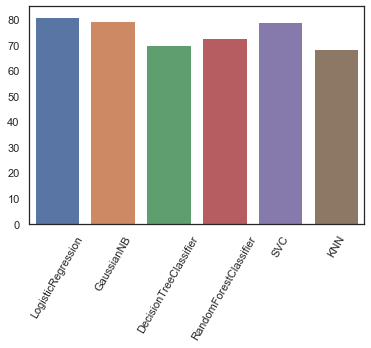

In [22]:
plt = sns.barplot(x = list(all_scores.keys()), y = list(all_scores.values()))
plt.set_xticklabels(labels = all_scores.keys(),rotation=60)

### Logestic Regression with built-in Cross Validation

In [24]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train)

d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_mode

In [25]:
y_pred = clf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy_score : ',score)   

Accuracy_score :  0.8292682926829268


In [29]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 454 to 303
Data columns (total 19 columns):
LoanAmountTerm            123 non-null float64
CreditHistory             123 non-null float64
LoanAmountLog             123 non-null float64
IncomeLog                 123 non-null float64
Gender_Female             123 non-null int64
Gender_Male               123 non-null int64
Married_No                123 non-null int64
Married_Yes               123 non-null int64
Dependents_0              123 non-null int64
Dependents_1              123 non-null int64
Dependents_2              123 non-null int64
Dependents_3              123 non-null int64
Education_Graduate        123 non-null int64
Education_Not Graduate    123 non-null int64
SelfEmployed_No           123 non-null int64
SelfEmployed_Yes          123 non-null int64
PropertyArea_Rural        123 non-null int64
PropertyArea_Semiurban    123 non-null int64
PropertyArea_Urban        123 non-null int64
dtypes: float64(4), int64(15)


## Deployment

In [26]:
pd.to_pickle(clf,'final_model.pkl')